In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
df = pd.read_csv(r"C:\Users\Admin\Desktop\customer_churn_analysis.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
df.columns[df.isna().any()]
df.columns[df.isnull().any()]
#counting non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

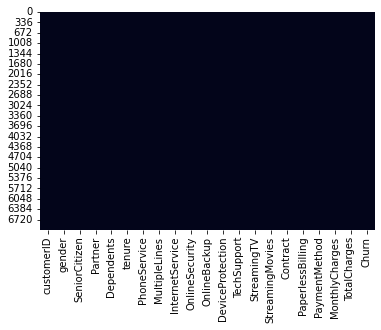

In [132]:
#missing map
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# #Cau 5
# def group_tenure(tenure):
#     if tenure >= 0 and tenure <=6:
#         return '0-6 month'
#     elif tenure > 9 and tenure <= 12:
#         return '6-12 month'
#     elif tenure > 12 and tenure <= 24:
#         return '12-24 month'
#     elif tenure > 24 and tenure <= 36:
#         return '24-36 month'
#     elif tenure > 36 and tenure <= 48:
#         return '36-48 month'
#     elif tenure > 48 and tenure <= 62:
#         return '48-62 month'
#     elif tenure > 62:
#         return '>62 month'

In [ ]:
# Cau 6

# from csv import writer, reader

# def add_columm_in_csv(input_file, output_file, transform_row):
#     with open(input_file, 'r') as read_obj, \
#         open(output_file, 'w', newline='') as write_obj:
#         csv_reader = reader(read_obj)
#         csv_writer = writer(write_obj)
#         for row in csv_reader:
#             transform_row(row, csv_reader.line_num)
#             csv_writer.writerow(row)

# add_columm_in_csv(filename, filename_output, lambda row, line_num: row.insert(1, row[0] + row[1]))


In [134]:
# convert categorical var from text to number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn.values)

In [166]:
# Selecting and Preparing the Feature Set and Target

X = df[["tenure"]]
y=df[["Churn"]]
X.head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [168]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [170]:
len(X_test)

2113

In [171]:
len(X_train)

4930

In [172]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [173]:
model.score(X_test, y_test)
#calculate y_pred from X_test against the real value y_test

0.7212494084240416

In [174]:
#confusion matric

y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,    0],
       [ 589,    0]], dtype=int64)

In [175]:
kfold = KFold(n_splits=10, random_state=None)
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=  kfold, scoring = scoring)
print("Accuracy: %.3f " % results.mean())
print("Accuracy: (%.3f) " % results.std())
print("Error Rate: %.3f" % (1 - results.mean() ))

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Accuracy: 0.734 
Accuracy: (0.014) 
Error Rate: 0.266


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
import plotly.express as px
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [1]:
# Cau 17
# gender_f = df['gender'].filter(items='Female').tolist()
# gender_m = df['gender'].filter(items='Male').tolist()

# fig = px.line(df, x="gender_f", y="TotalCharges", title="Total Charges by gender")
# fig.show()